In [104]:
%reset -f
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib as mpl
import matplotlib.colors as colors




In [105]:
ds = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\olr.day.mean.nc')
f = xr.open_dataset(r'C:\Users\lv299\OneDrive\Melbourne-Uni\Week 3\olr.mon.mean.nc')
f

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 73, time: 575)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 1974-06-01 1974-07-01 ... 2022-04-01
Data variables:
    olr      (time, lat, lon) float32 ...
Attributes:
    title:          Monthly means of OLR from interpolated OLR dataset
    description:    Data is interpolated in time and space from NOAA twice-da...
    platform:       Observation
    Conventions:    CF-1.2
    References:     https://www.psl.noaa.gov/data/gridded/data.interp_OLR.html
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.interp_OL...
    Citation:       Liebmann and Smith: June 2006: Description of a Complete ...
    dataset_title:  NOAA Interpolated Outgoing Longwave Radiation (OLR)
    source:         ftp.cpc.ncep.noaa.gov precip/noaa..
    date_modified:  12 Feb 2019
    history:        Created from daily OLR files obtained at NCEP and further...

In [106]:
dsmonth = f['olr'].loc['1950-01-01':'2022-04-01',:,:]
dsmonth = dsmonth.resample(time='QS-NOV').mean(dim="time")
NDJ=dsmonth[4::4,:,:]
NDJ['time']=NDJ['time.year']
NDJ=NDJ.rename({'time': 'Year'})
NDJ

<xarray.DataArray 'olr' (Year: 47, lat: 73, lon: 144)>
array([[[206.05891 , 206.05891 , 206.05891 , ..., 206.05891 ,
         206.05891 , 206.05891 ],
        [205.79497 , 205.75403 , 205.70937 , ..., 205.89392 ,
         205.86095 , 205.82387 ],
        [206.5142  , 206.48903 , 206.4616  , ..., 206.5951  ,
         206.57233 , 206.54181 ],
        ...,
        [119.66107 , 118.8075  , 117.934845, ..., 122.051186,
         121.27654 , 120.485176],
        [117.48425 , 117.17094 , 116.856606, ..., 118.38209 ,
         118.091774, 117.79415 ],
        [111.38113 , 111.38113 , 111.38113 , ..., 111.38113 ,
         111.38113 , 111.38113 ]],

       [[203.6029  , 203.6029  , 203.6029  , ..., 203.6029  ,
         203.6029  , 203.6029  ],
        [205.32704 , 205.26634 , 205.18755 , ..., 205.46333 ,
         205.41774 , 205.37317 ],
        [207.33075 , 207.28265 , 207.22624 , ..., 207.43428 ,
         207.40962 , 207.36372 ],
...
        [116.48405 , 116.48405 , 116.48405 , ..., 119.84014 ,
         119.84014 , 119.84014 ],
        [118.335045, 118.335045, 118.335045, ..., 119.50179 ,
         119.50179 , 119.50179 ],
        [114.88154 , 114.88154 , 114.88154 , ..., 114.88154 ,
         114.88154 , 114.88154 ]],

       [[204.17293 , 204.17293 , 204.17293 , ..., 204.17293 ,
         204.17293 , 204.17293 ],
        [205.1931  , 205.1931  , 205.1931  , ..., 205.53271 ,
         205.53271 , 205.53271 ],
        [207.20215 , 207.20215 , 207.20215 , ..., 208.245   ,
         208.245   , 208.245   ],
        ...,
        [113.90323 , 113.90323 , 113.90323 , ..., 117.829216,
         117.829216, 117.829216],
        [113.49292 , 113.49292 , 113.49292 , ..., 116.03477 ,
         116.03477 , 116.03477 ],
        [110.38996 , 110.38996 , 110.38996 , ..., 110.38996 ,
         110.38996 , 110.38996 ]]], dtype=float32)
Coordinates:
  * Year     (Year) int64 1975 1976 1977 1978 1979 ... 2017 2018 2019 2020 2021
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0

In [107]:
climatology = NDJ.mean(axis=0)
olra = NDJ - climatology

In [108]:
weights = np.cos(np.deg2rad(olra.lat))
weights.name = "weights"
olra_weighted = olra.weighted(weights)
weighted_mean = olra_weighted.mean(("lon", "lat"))
#print(weighted_mean)
globalmean = olra.mean(axis=(1,2))
#print(globalmean)
olraa=olra - weighted_mean

In [109]:
oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)
new_ds = xr.merge([olraa,oni.to_xarray()],join='inner')

In [110]:
new_ds = xr.merge([olraa,oni.to_xarray()],join='inner')
Elnino = new_ds['olr'].loc[new_ds['NDJ']>0.5].mean(axis=0)
Lanina = new_ds['olr'].loc[new_ds['NDJ']<-0.5].mean(axis=0)
lat = new_ds['lat']
lon = new_ds['lon']

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

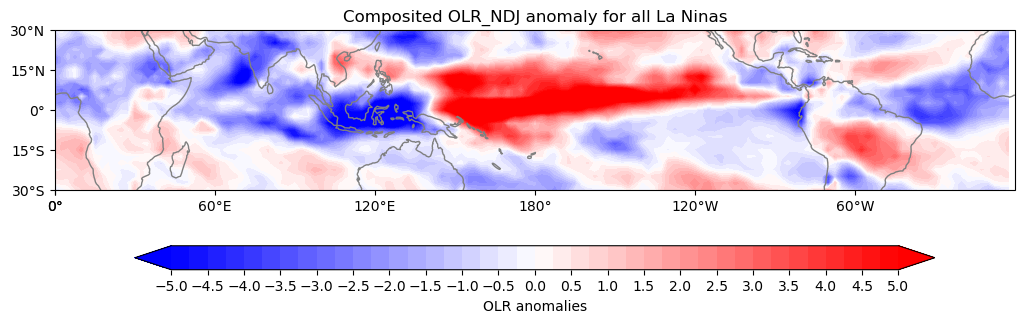

In [111]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all La Ninas')

c = ax.contourf(lon,lat,Lanina,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder=0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.1,0.5),
             shrink=0.7)

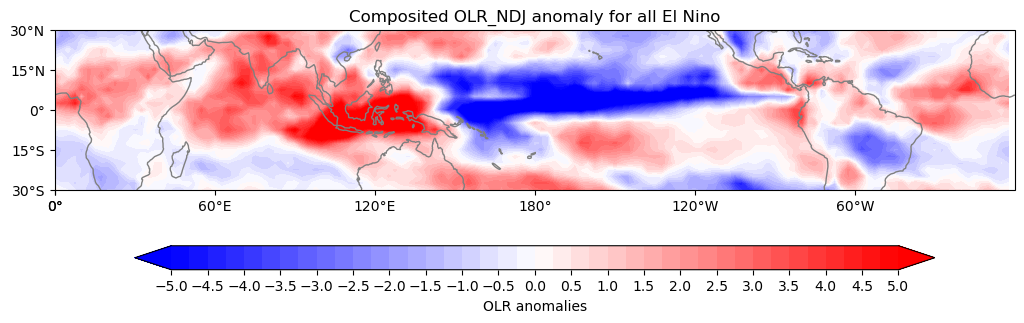

In [112]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all El Nino')

c = ax.contourf(lon,lat,Elnino,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

In [113]:
sgl= (1983, 1988, 1995, 1998, 2005, 2007, 2010, 2016, 2020)
sgl = np.array(sgl,dtype = 'int32')
sgl =sgl -1975
dbl=(1984, 1999, 2008, 2011, 2017, 2021)
dbl = np.array(dbl,dtype = 'int32')
dbl = dbl -1975
tpl=(1975, 2000)
tpl = np.array(tpl,dtype = 'int32')
tpl = tpl -1975
new_ds.olr

<xarray.DataArray 'olr' (Year: 47, lat: 73, lon: 144)>
array([[[-2.6313508 , -2.6313508 , -2.6313508 , ..., -2.6313508 ,
         -2.6313508 , -2.6313508 ],
        [-3.8254578 , -3.851001  , -3.8797638 , ..., -3.8496125 ,
         -3.8721802 , -3.8840516 ],
        [-4.33298   , -4.334201  , -4.335849  , ..., -4.5124235 ,
         -4.519351  , -4.5302305 ],
        ...,
        [ 1.693341  ,  1.2992218 ,  0.8896682 , ...,  0.8954208 ,
          0.5561111 ,  0.20961452],
        [-0.7603257 , -0.88558507, -1.0128205 , ..., -1.328212  ,
         -1.4345276 , -1.5493805 ],
        [-4.2765455 , -4.2765455 , -4.2765455 , ..., -4.2765455 ,
         -4.2765455 , -4.2765455 ]],

       [[-4.980942  , -4.980942  , -4.980942  , ..., -4.980942  ,
         -4.980942  , -4.980942  ],
        [-4.186966  , -4.2322693 , -4.295166  , ..., -4.1737823 ,
         -4.208969  , -4.2283325 ],
        [-3.410019  , -3.4341583 , -3.4647827 , ..., -3.5668182 ,
         -3.5756378 , -3.6018982 ],
...
        [ 0.7436863 ,  1.2031361 ,  1.6662403 , ...,  0.9117466 ,
          1.3470799 ,  1.7919499 ],
        [ 2.3178363 ,  2.5058932 ,  2.6929889 , ...,  2.0188632 ,
          2.2028613 ,  2.385631  ],
        [ 1.4512364 ,  1.4512364 ,  1.4512364 , ...,  1.4512364 ,
          1.4512364 ,  1.4512364 ]],

       [[-1.9599768 , -1.9599768 , -1.9599768 , ..., -1.9599768 ,
         -1.9599768 , -1.9599768 ],
        [-1.8699652 , -1.8545691 , -1.8386694 , ..., -1.6534582 ,
         -1.6430517 , -1.6178442 ],
        [-1.0876776 , -1.0637213 , -1.037934  , ..., -0.30516112,
         -0.2893225 , -0.26968443],
        ...,
        [-1.5071417 , -1.047692  , -0.5845877 , ..., -0.7691885 ,
         -0.33385527,  0.11101472],
        [-2.1942983 , -2.0062413 , -1.8191458 , ..., -1.1181723 ,
         -0.9341742 , -0.7514044 ],
        [-2.7103505 , -2.7103505 , -2.7103505 , ..., -2.7103505 ,
         -2.7103505 , -2.7103505 ]]], dtype=float32)
Coordinates:
  * Year     (Year) int64 1975 1976 1977 1978 1979 ... 2017 2018 2019 2020 2021
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0

In [114]:
Lasgl = new_ds.olr[sgl,:,:].mean(axis=0)
Ladbl = new_ds.olr[dbl,:,:].mean(axis=0)
Latpl = new_ds.olr[tpl,:,:].mean(axis=0)

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

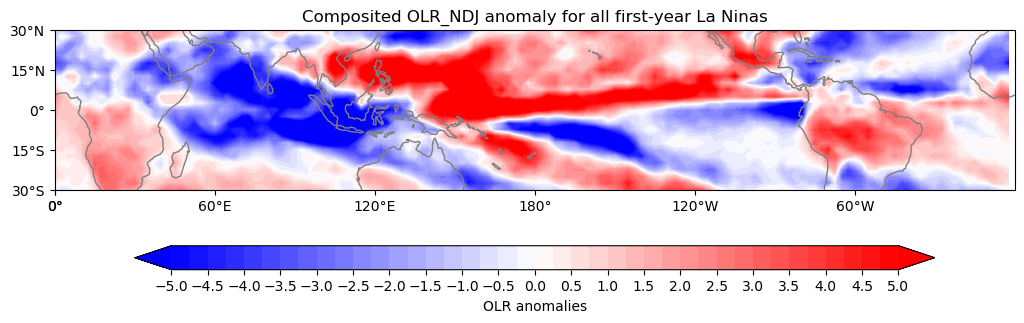

In [115]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all first-year La Ninas')

c = ax.contourf(lon,lat,Lasgl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

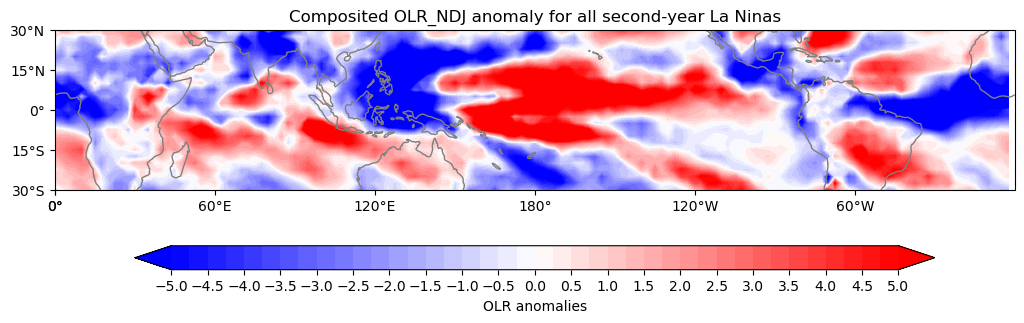

In [116]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all second-year La Ninas')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

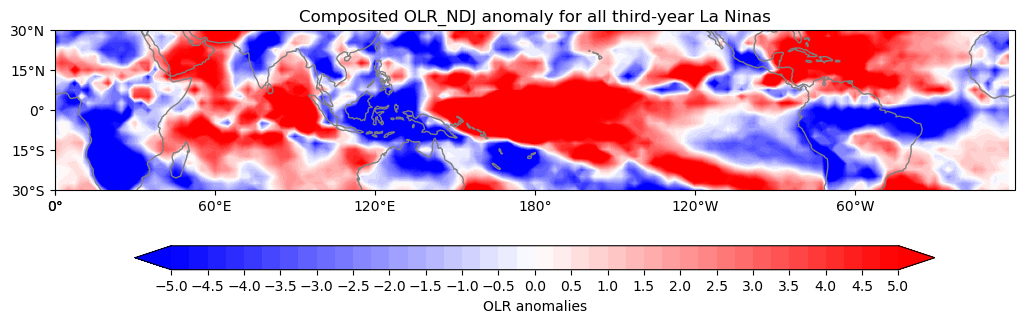

In [117]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_NDJ anomaly for all third-year La Ninas')

c = ax.contourf(lon,lat,Latpl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

In [1]:
dsmonth = f['olr'].loc['1950-01-01':'2022-04-01',:,:]
dsmonth = dsmonth.resample(time='QS-OCT').mean(dim="time")
OND=dsmonth[6::4,:,:]
print(OND)
OND['time']=OND['time.year']
OND=OND.rename({'time': 'Year'})


NameError: name 'f' is not defined

In [126]:
climatology = OND.mean(axis=0)
olra = OND - climatology

In [127]:
weights = np.cos(np.deg2rad(olra.lat))
weights.name = "weights"
olra_weighted = olra.weighted(weights)
weighted_mean = olra_weighted.mean(("lon", "lat"))
#print(weighted_mean)
globalmean = olra.mean(axis=(1,2))
#print(globalmean)
olraa=olra - weighted_mean

In [128]:
oni = pd.read_csv('Year_NDJ.txt',delim_whitespace=True,index_col=0)
new_ds = xr.merge([olraa,oni.to_xarray()],join='inner')

In [129]:
new_ds = xr.merge([olraa,oni.to_xarray()],join='inner')
Elnino = new_ds['olr'].loc[new_ds['NDJ']>0.5].mean(axis=0)
Lanina = new_ds['olr'].loc[new_ds['NDJ']<-0.5].mean(axis=0)
lat = new_ds['lat']
lon = new_ds['lon']

C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings.extend(multi_line_string)
C:\Users\lv299\anaconda3\lib\site-packages\cartopy\crs.py:402: ShapelyDeprecatio

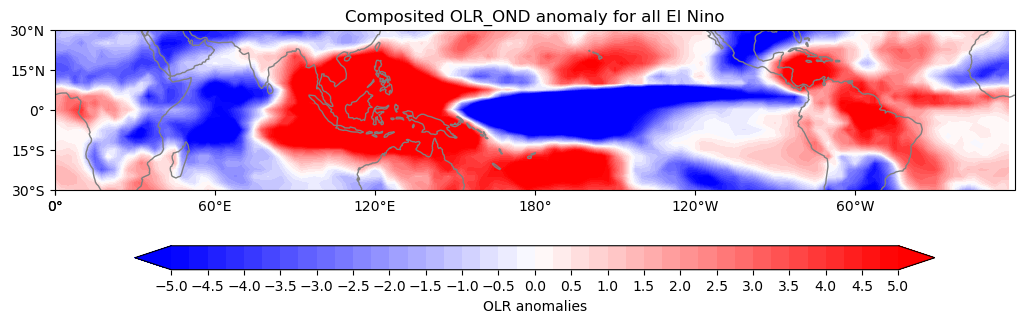

In [130]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_OND anomaly for all El Nino')

c = ax.contourf(lon,lat,Elnino,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

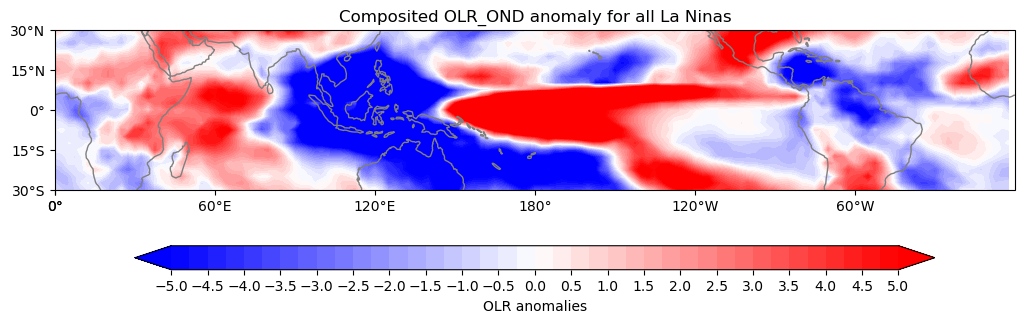

In [131]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_OND anomaly for all La Ninas')

c = ax.contourf(lon,lat,Lanina,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder=0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.1,0.5),
             shrink=0.7)

In [132]:
Lasgl = new_ds.olr[sgl,:,:].mean(axis=0)
Ladbl = new_ds.olr[dbl,:,:].mean(axis=0)
Latpl = new_ds.olr[tpl,:,:].mean(axis=0)

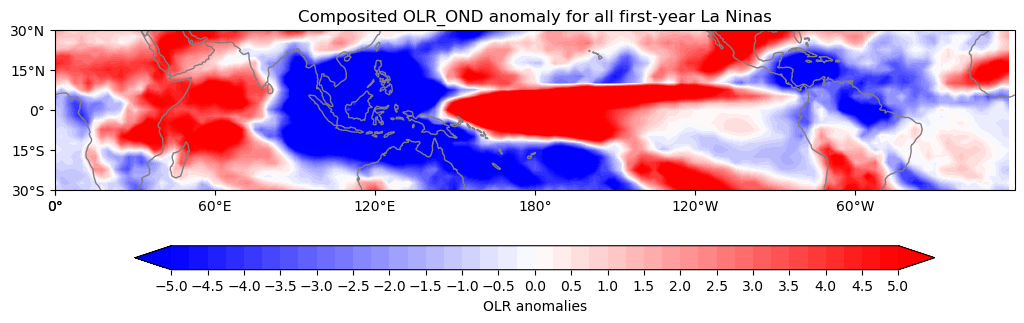

In [138]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_OND anomaly for all first-year La Ninas')

c = ax.contourf(lon,lat,Lasgl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

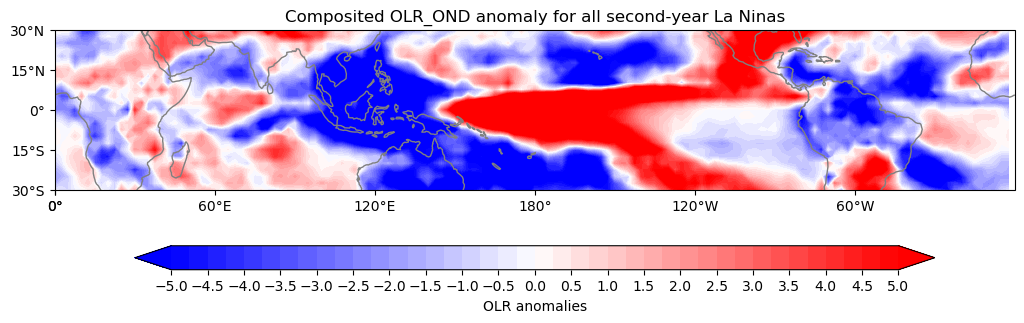

In [139]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_OND anomaly for all second-year La Ninas')

c = ax.contourf(lon,lat,Ladbl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)

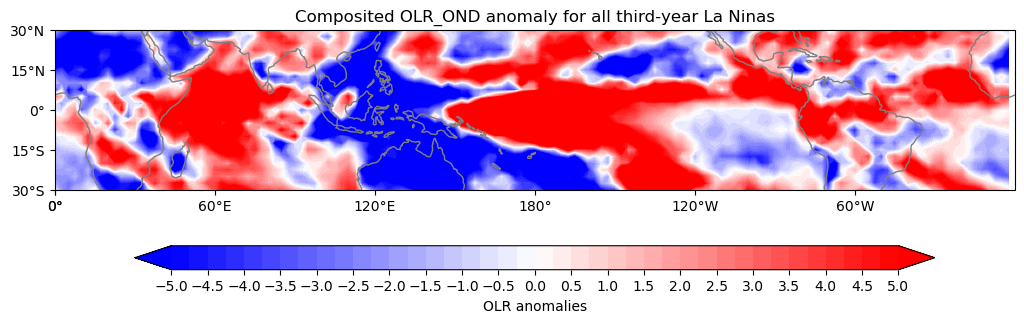

In [140]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
import cartopy.mpl.ticker as cticker 


leftlon, rightlon, lowerlat, upperlat = (0,420,-30,30)
img_extent = [leftlon, rightlon, lowerlat, upperlat]
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()

   
fig = plt.figure(figsize=(16,8))


ax = fig.add_axes([0.1, 0.2, 0.6, 0.6],projection = ccrs.PlateCarree(central_longitude=180),zorder=1)
ax.set_extent(img_extent, crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE,color='grey') 
ax.set_xticks(range(0,360+60,60), crs=ccrs.PlateCarree())
ax.set_yticks(range(-30,35,15), crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.title.set_text('Composited OLR_OND anomaly for all third-year La Ninas')

c = ax.contourf(lon,lat,Latpl,
                levels=np.arange(-5,5.25,0.25),
                extend='both' ,
                cmap = plt.get_cmap('bwr'),
                transform=ccrs.PlateCarree(),zorder = 0)

fig.colorbar(c, cax=fig.add_axes([0.15, 0.3, 0.5, 0.03 ]),
             orientation='horizontal',  
             label= 'OLR anomalies', 
             ticks=np.arange(-5,5.5,0.5),
             shrink=0.7)